# LGM VIP Internship - LetsGrowMore
## Data Science Internship task 3
## Exploratory Data analysis on Dataset-Terrorism


### importing libraries

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings as warn
import seaborn as sns

In [41]:
# Reading Data set
data=pd.read_csv("globalterrorismdb_0718dist.csv")
data.head()

C:\Users\MY PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [61]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [63]:
data.shape

(181691, 135)

In [4]:
# Describing the data
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
# data types
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [8]:
# Data set columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [10]:
# Taking required columns for Analysis
data=data[['eventid','iyear','imonth','country','region','provstate','city','crit1','crit2','crit3','success','suicide','attacktype1','targtype1','natlty1','gname','guncertain1','claimed','weaptype1','nkill','nwound']]
data.head()

,eventid,iyear,imonth,country,region,provstate,city,crit1,crit2,crit3,...,suicide,attacktype1,targtype1,natlty1,gname,guncertain1,claimed,weaptype1,nkill,nwound
0,197000000001,1970,7,58,2,NaN,Santo Domingo,1,1,1,...,0,1,14,58.0,MANO-D,0.0,NaN,13,1.0,0.0
1,197000000002,1970,0,130,1,Federal,Mexico city,1,1,1,...,0,6,7,21.0,23rd of September Communist League,0.0,NaN,13,0.0,0.0
2,197001000001,1970,1,160,5,Tarlac,Unknown,1,1,1,...,0,1,10,217.0,Unknown,0.0,NaN,13,1.0,0.0
3,197001000002,1970,1,78,8,Attica,Athens,1,1,1,...,0,3,7,217.0,Unknown,0.0,NaN,6,NaN,NaN
4,197001000003,1970,1,101,4,Fukouka,Fukouka,1,1,1,...,0,7,7,217.0,Unknown,0.0,NaN,8,NaN,NaN


In [11]:
# Returning Number of Missing values
data.isnull().sum()

eventid            0
iyear              0
imonth             0
country            0
region             0
provstate        421
city             434
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
targtype1          0
natlty1         1559
gname              0
guncertain1      380
claimed        66120
weaptype1          0
nkill          10313
nwound         16311
dtype: int64

In [12]:
# Combining two columns i.e., 'nkill' and 'nwound' into a new column 'casualities'
data['nkill']=data['nkill'].fillna(0)
data['nwound']=data['nwound'].fillna(0)
data['casualities']=data['nkill']+data['nwound']
data.isnull().sum()

eventid            0
iyear              0
imonth             0
country            0
region             0
provstate        421
city             434
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
targtype1          0
natlty1         1559
gname              0
guncertain1      380
claimed        66120
weaptype1          0
nkill              0
nwound             0
casualities        0
dtype: int64

In [13]:
data.describe()

,eventid,iyear,imonth,country,region,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,guncertain1,claimed,weaptype1,nkill,nwound,casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,180132.000000,181311.000000,115571.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,131.968501,7.160938,0.988530,0.993093,0.875668,0.889598,0.036507,3.247547,8.439719,127.686441,0.081440,0.049666,6.447325,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,3.388303,112.414535,2.933408,0.106483,0.082823,0.329961,0.313391,0.187549,1.915772,6.653838,89.299120,0.273511,1.093195,2.173435,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,78.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,83.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,98.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,101.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,160.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,173.000000,0.000000,0.000000,6.000000,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,1.000000,13.000000,1570.000000,8191.000000,9574.000000


In [39]:
print(f"""
There are {data.country.nunique()} Countries from {data.region.nunique()} Regions covered in dataset terrorist attack dataset terrorist attack data in 3years from {data.attacktype1.nunique()}.Overall 1816 91 terrorist attacks are recorded here which caused about {data.casualities.nunique()} Casualities consisted of {data.nkill.nunique()} and {data.nwound.nunique()} Wounded
""")




There are 205 Countries from 12 Regions covered in dataset terrorist attack dataset terrorist attack data in 3years from 9.Overall 1816 91 terrorist attacks are recorded here which caused about 345 Casualities consisted of 205 and 238 Wounded



## Data Visualization

Text(0.5, 1.0, 'Heatmap showing the null values present in dataframe-Terrorism')

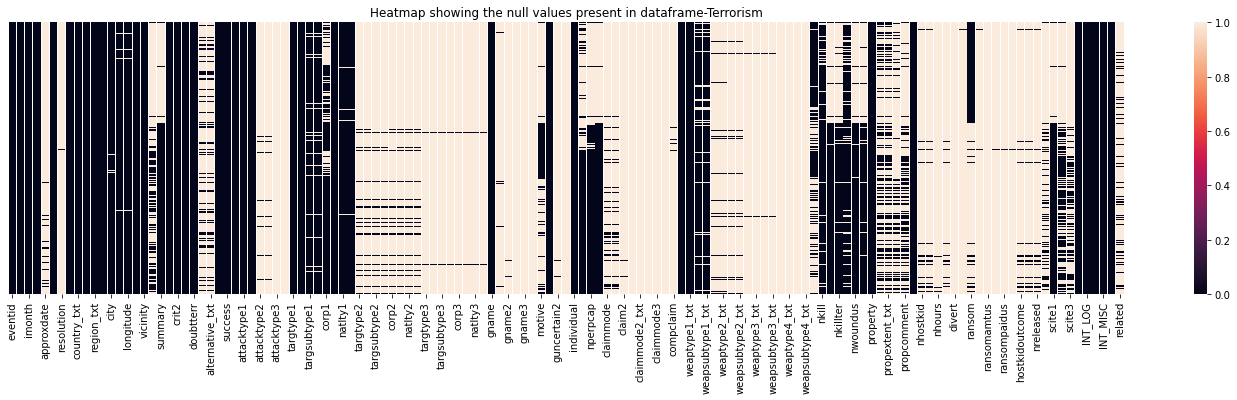

In [66]:
plt.figure(figsize=(25,5))
sns.heatmap(data.isnull(),yticklabels=False)
plt.title("Heatmap showing the null values present in dataframe-Terrorism")

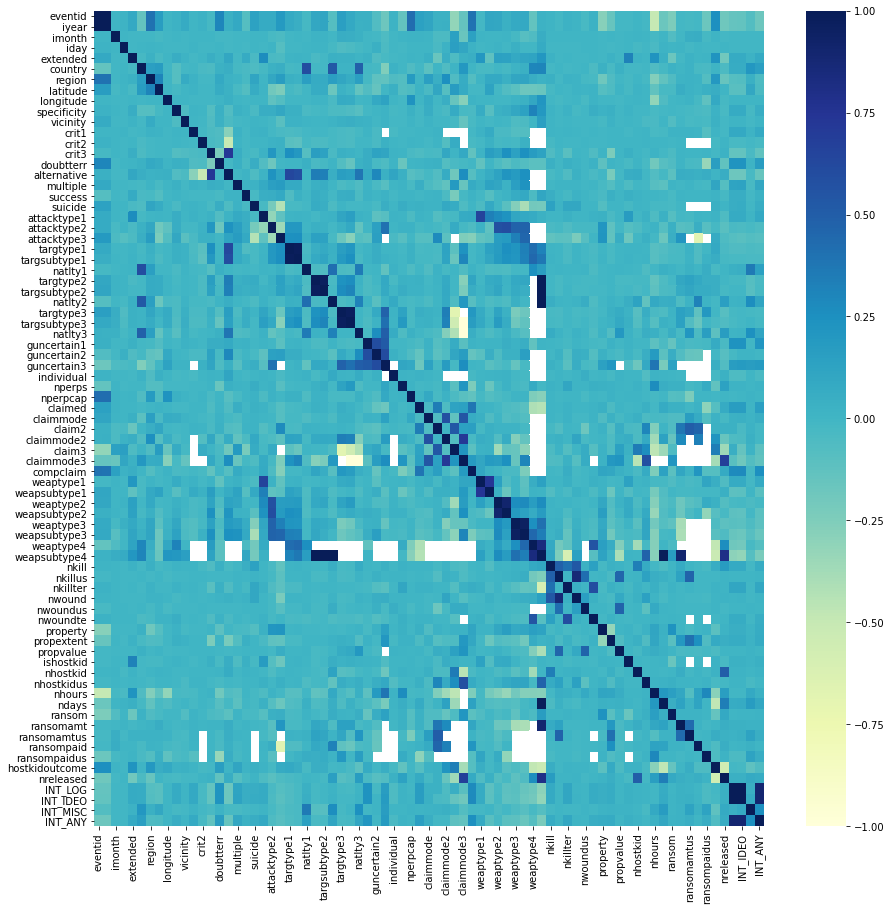

In [67]:
corr=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=corr,cmap="YlGnBu")
plt.show()

### The country with highest number of attacks

In [68]:
data['country_txt'].value_counts().index[0]

'Iraq'

### Top 10 countries with highest number of attacks

In [69]:
data['country_txt'].value_counts().index[:4]

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India'], dtype='object')

### Region with highest number of attacks

In [70]:
data['region_txt'].value_counts().index[0]

'Middle East & North Africa'

### Top 3 regions with most attacks 

In [71]:
data['region_txt'].value_counts().index[:4]

Index(['Middle East & North Africa', 'South Asia', 'South America',
       'Sub-Saharan Africa'],
      dtype='object')

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


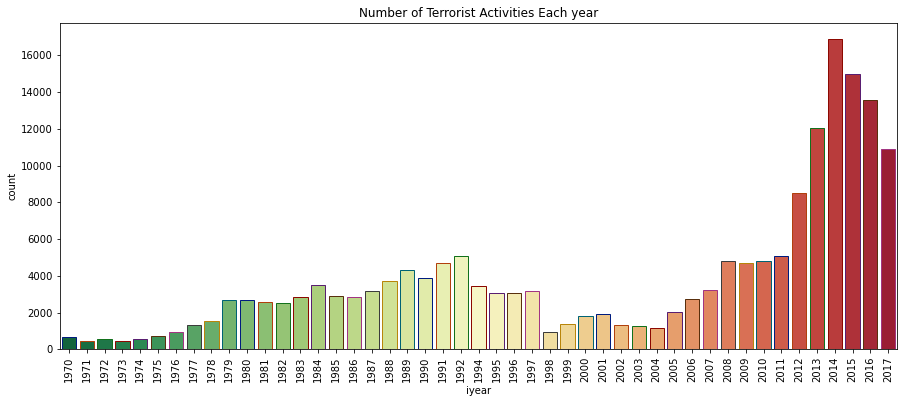

In [43]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activities Each year")
plt.show()

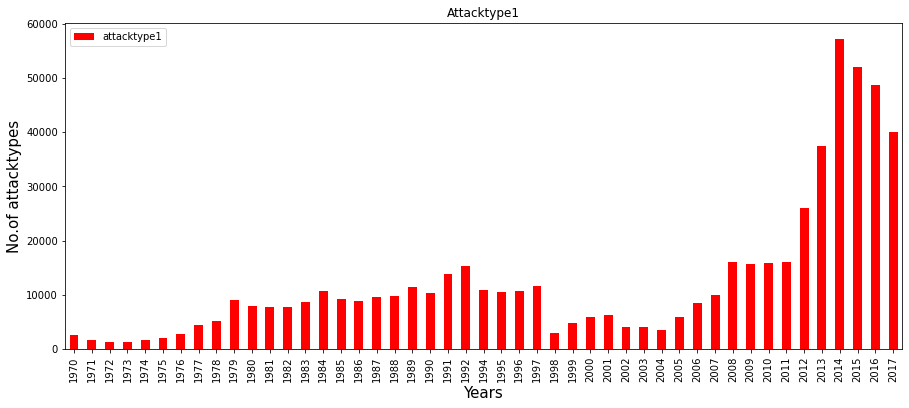

In [50]:
yearc=data[['iyear','attacktype1']].groupby('iyear').sum()
yearc.plot(kind='bar',color='red',figsize=(15,6))
plt.title("Attacktype1")
plt.xlabel('Years',fontsize=15)
plt.ylabel('No.of attacktypes',fontsize=15)
plt.show()

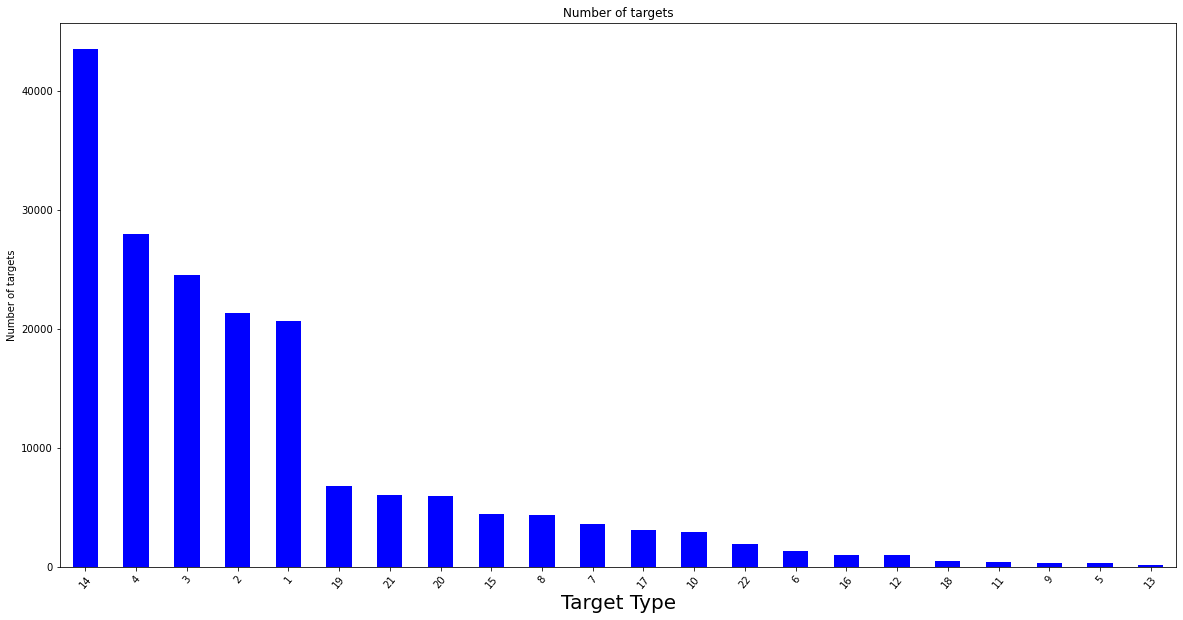

In [53]:
data['targtype1'].value_counts().plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation=50)
plt.xlabel('Target Type',fontsize=20)
plt.ylabel('Number of targets')
plt.title('Number of targets')
plt.show()

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


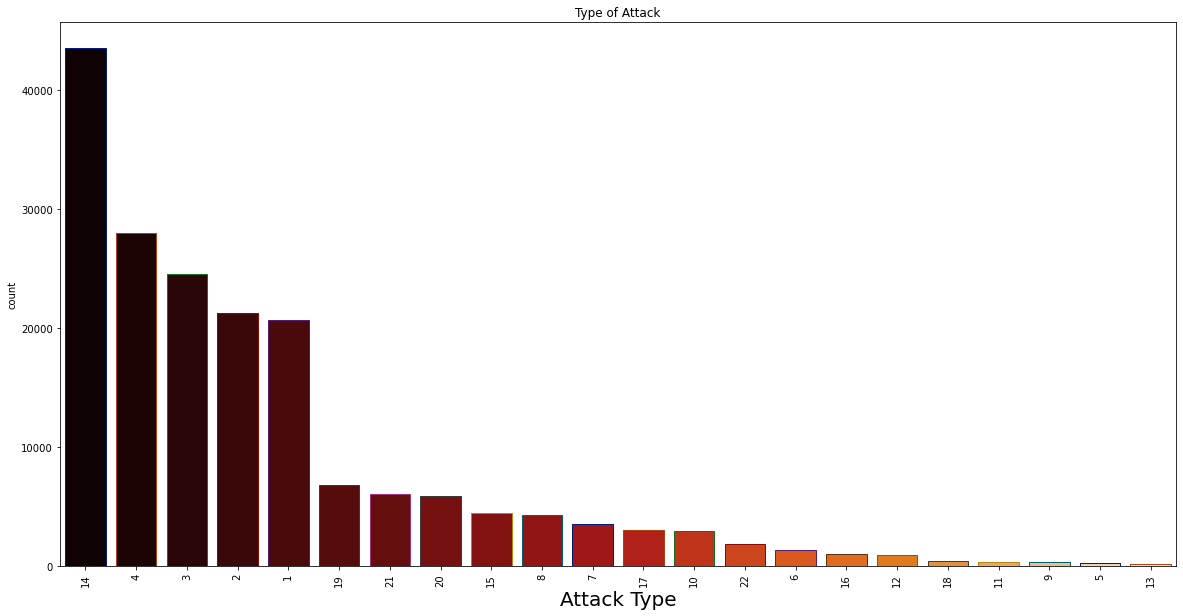

In [57]:
plt.subplots(figsize=(20,10))
sns.countplot(data['targtype1'],order=data['targtype1'].value_counts().index,palette='gist_heat',edgecolor=sns.color_palette("dark",10))
plt.xticks(rotation=90)
plt.xlabel('Attack Type',fontsize=20)
plt.ylabel('count')
plt.title('Type of Attack')
plt.show()

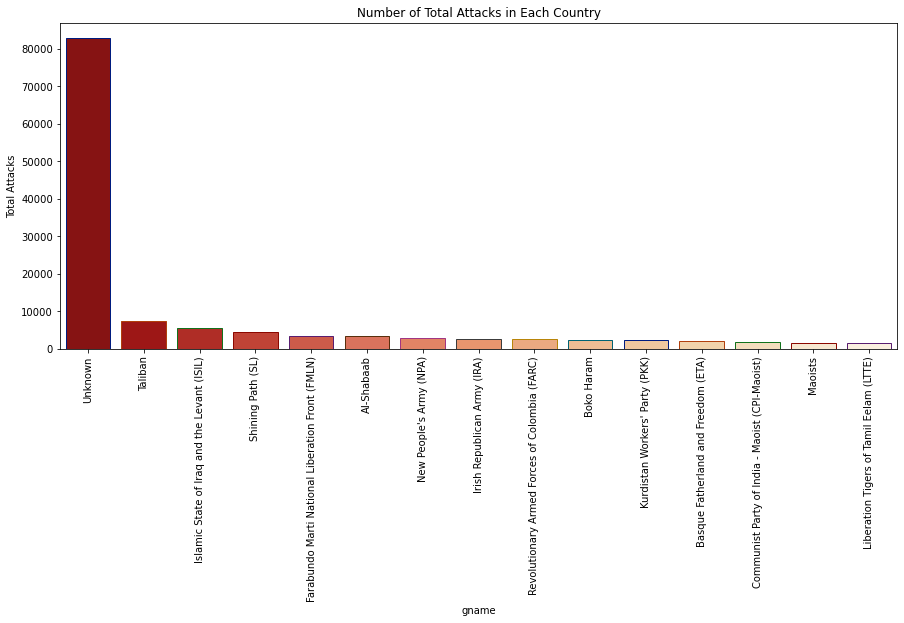

In [58]:
plt.subplots(figsize=(15,6))
country_attacks = data.gname.value_counts()[:15].reset_index()
country_attacks.columns = ['gname','Total Attacks']
sns.barplot(x=country_attacks.gname,y=country_attacks['Total Attacks'],palette='OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title("Number of Total Attacks in Each Country")
plt.show()

In [59]:
sattk=data.success.value_counts()[:10]
sattk

1    161632
0     20059
Name: success, dtype: int64

In [60]:
data.gname.value_counts()[1:11]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: gname, dtype: int64

## Conclusions
### There are 205 Countries from 12 Regions covered in the dataset terrorist attack data in 3 years from 1970 to 2017.Overall 181691 terrorist attacks are recorded here which caused about 935737.0 Casualities consisted of 411868.0 Kills and 523869.0 Wounded.
#### 1. Taliban has done most of attacks 
#### 2.Most of the attacks were made in the year 2014
#### 3.Bombing type attack were used most of time

## Thank You 